<a href="https://colab.research.google.com/github/titilomt/data_science_puc_projects/blob/master/EstatisticaPOS_trab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PÓS-GRADUAÇÃO EM CIÊNCIAS DE DADOS E BIG DATA ESTATISTICA GERAL

## Considerações 

***Todos os csv estão disponíveis no github na pasta csv*** 

Link para os csv: https://github.com/titilomt/data_science_puc_projects/tree/master/csv

## Trabalho 01 - Estatistica descritiva

### Exercicio 01 - Fabrica de azulejos

#### Situação Problema
Uma fábrica de azulejos recentemente começou a receber reclamações de seus clientes. A maioria das
reclamações era relativa aos seguintes problemas:
- Os azulejos, ao serem manuseados, quebravam-se facilmente
- O assentamento dos azulejos não produzia um resultado uniforme em relação ao nível da parede.

#### Hipóteses

Em vista dessa situação, o gerente de vendas da indústria decidiu formar um grupo de trabalho para estudar estes
problemas. Na primeira fase do estudo, o grupo de trabalho concluiu que a produção de azulejos com espessura não
adequada poderia ser a causa dos problemas relatados pelos clientes. Esta conclusão resultou do conhecimento dos
seguintes fatos:
- Azulejos com espessura muito fina quebram-se facilmente.
- A falta de uniformidade na espessura dos azulejos provoca dificuldades durante o seu assentamento.

#### Premissas

Sabe-se que os limites de especificação para a espessura dos azulejos são 5,0 +- 1.5mm, ou seja, a
espessura dos azulejos deve variar entre 3.5 a 6.5 mm, sendo o valor nominal de especificação igual a 5.0 mm.



### Análise

Para avaliar se estavam ocorrendo problemas com a espessura dos azulejos produzidos, o grupo decidiu
retirar uma amostra aleatória dos azulejos fabricados pela empresa, medir a espessura destes azulejos e
comparar os resultados obtidos com as especificações. Como a indústria empregava duas turmas de trabalho
(turmas A e B) e poderia haver diferença na qualidade dos azulejos produzidos por cada turma, foi utilizada
uma estratificação, sendo então retirada uma amostra de 80 azulejos produzidos pela turma A e 80
fabricados pela turma B. Os dados com as medidas de espessura (em mm) de 160 azulejos produzidos pela fábrica
separados por turma de trabalho coletados estão apresentados no arquivo **Azulejo.csv**

In [5]:
# 
# Importações nescessárias para este Trabalho
# 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import json

In [ ]:
# Inicializando DataFrame

df_azulejo = pd.read_csv('/tmp/Azulejo.csv', sep=';')

# Transformando str para float

df_azulejo['Espessura'] = df_azulejo.Espessura.str.replace(',', '.').astype(float)

# Descrevendo dados da tabela de Azulejos
# Informações sobre a table
df_azulejo.info()

# Descrição das variáveis Mapeadas
 
print("""

Variáveis mapeadas: 
-----------------------------------
|    Espessura    |    Turma      |
-----------------------------------
|    Quantitativa |   Qualitativa |
|      Discreta   |     nominal   |
-----------------------------------

""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Espessura  160 non-null    float64
 1   Turma      160 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


Variáveis mapeadas: 
-----------------------------------
|    Espessura    |    Turma      |
-----------------------------------
|    Quantitativa |   Qualitativa |
|      Discreta   |     nominal   |
-----------------------------------




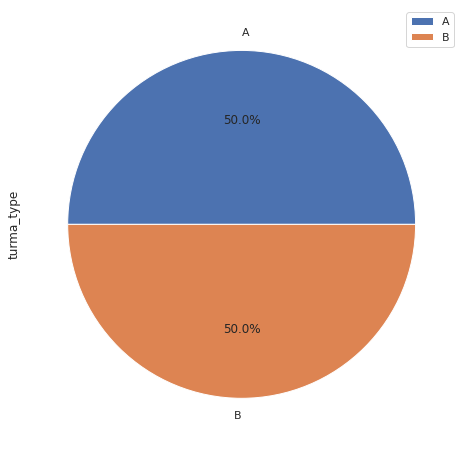

In [ ]:
#
# VARIAVEIS QUALITATIVAS NOMINAIS
# Explorando Dados Categoricos Nominais

type_counts = df_azulejo['Turma'].value_counts() # Conta valores de acordo com Turmas

df_turmas_type = pd.DataFrame({'turma_type': type_counts}, index=['A', 'B'])

df_turmas_type.plot.pie(y='turma_type', figsize=(10,8), autopct='%1.1f%%')

plt.show()

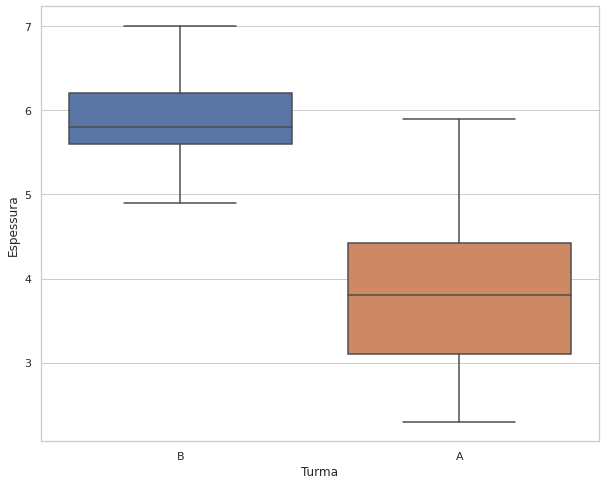

In [ ]:
# Boxplot grafico para distribuição numerica de Turmas A x B
%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Turma', y='Espessura', data=df_azulejo, orient="v")

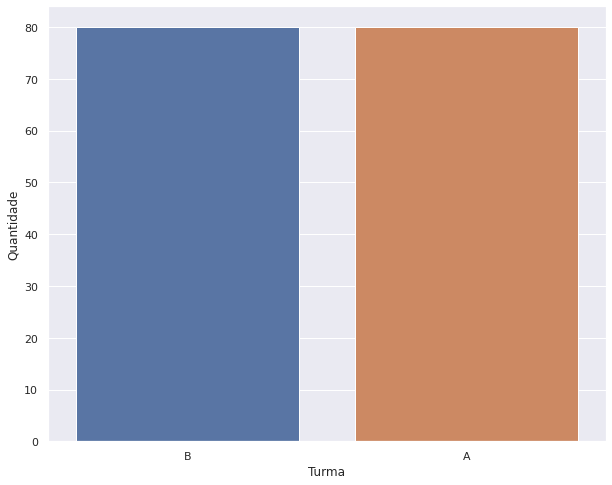

In [ ]:
# Grafico de Barras contagem de Azulejos produzidos por Turmas A x B

sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Turma', data=df_azulejo)
ax.set(ylabel='Quantidade')
plt.show()

In [ ]:
# ------------------------------------------------------------------------------
# VARIAVEIS QUANTITATIVAS DISCRETAS
# Descrição de variáveis numericas 

print('Descrição de variações numericas: \n', df_azulejo['Espessura'].agg(['min', 'max', 'mean', 'std', 'median']).round(decimals=2), sep='\n')


Descrição de variações numericas: 

min       2.30
max       7.00
mean      4.87
std       1.23
median    5.30
Name: Espessura, dtype: float64


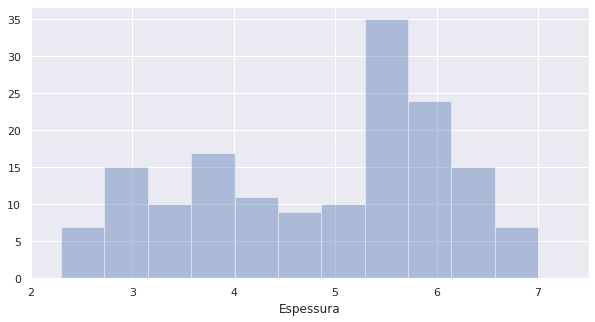

In [ ]:
# Histograma geral de Tabela de Azulejos

filter_data = df_azulejo.dropna(subset=['Espessura']) # Removendo valores nulos de Serie Espessura
plt.figure(figsize=(10,5)) # configurando Tamanho do gráfico
ax = sns.distplot(filter_data['Espessura'], kde=False, bins=11) # plotando grafico de Histrograma
ax.set_xlim(2, 7.5)
plt.show()

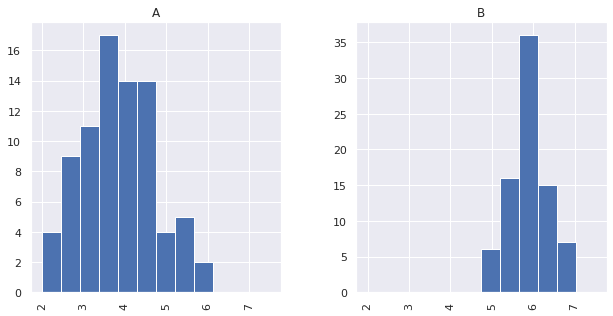

In [ ]:
# Composição do Gráfico Histograma variáveis numericas Para turmas A e B separadamente

df_azulejo.hist(figsize=(10,5), bins=12, range=(2, 7.5), column='Espessura', by='Turma')
plt.show()

### Perguntas a serem respondidas:

a) Você considera que a *“espessura não adequada dos azulejos”* pode ser considerada como uma causa influente dos problemas detectados? Justifique sua resposta.

b) Qual é a forma da distribuição das medidas de espessura dos azulejos produzidos pela fábrica?

c) As proporções de itens produzidos fora da especificação estão relacionadas com as hipóteses da situação problema? Justifique.

### Respostas: 

a) Sim. Como diz a premissa os azulejos, para que tenham uma garantia de qualidade, devem estar dentro do limite especificado para a espessura dos azulejos.

b) Apessar de o gráfico mostrar que tem uma tendencia media muito forte, a forma da distribuição dos azulejos é Assimétrico à esquerda.

c) Sim, pois como apresentado pelo gráfico de histograma, temos uma frequencia alta de azulejos produzidos fora da especificação, apesar de a grande maioria estar presente no intervalo de 3.5 a 6.5 mm.

In [ ]:
# 
# Examinando variáveis Espessura de Turmas A e B separadamente do todo
# 

df_turma_A = pd.DataFrame({'Espessura': df_azulejo.query("Turma == 'A'")['Espessura'].tolist()}, columns=['Espessura'])
df_turma_B = pd.DataFrame({'Espessura': df_azulejo.query("Turma == 'B'")['Espessura'].tolist()}, columns=['Espessura'])

print('\nDescrição de variações numericas Turma A:', df_turma_A['Espessura'].agg(['min', 'max', 'mean', 'std', 'median']).round(decimals=2), sep='\n')
print('\nDescrição de variações numericas Turma B:', df_turma_B['Espessura'].agg(['min', 'max', 'mean', 'std', 'median']).round(decimals=2), sep='\n')




Descrição de variações numericas Turma A:
min       2.30
max       5.90
mean      3.86
std       0.87
median    3.80
Name: Espessura, dtype: float64

Descrição de variações numericas Turma B:
min       4.90
max       7.00
mean      5.87
std       0.48
median    5.80
Name: Espessura, dtype: float64


In [ ]:
#
# Dicionario de possibilidades 
# 
likelihood = {}

# seleção de eventos para calcular probabilidade

selecao_a_fora_spec = (df_turma_A['Espessura'] < 3.5) | (df_turma_A['Espessura'] > 6.5)
selecao_b_fora_spec = (df_turma_B['Espessura'] < 3.5) | (df_turma_B['Espessura'] > 6.5)
selecao_a_acima_spec = (df_turma_A['Espessura'] > 6.5)
selecao_b_acima_spec = (df_turma_B['Espessura'] > 6.5)
selecao_a_abaixo_spec = (df_turma_A['Espessura'] < 3.5)
selecao_b_abaixo_spec = (df_turma_B['Espessura'] < 3.5)

# Calculo de probabilidade 
prob_fora_espc_A = len(df_turma_A["Espessura"][selecao_a_fora_spec])/len(df_turma_A["Espessura"])
prob_fora_espc_B = len(df_turma_B["Espessura"][selecao_b_fora_spec])/len(df_turma_B["Espessura"])
prob_acima_espc_A = len(df_turma_A["Espessura"][selecao_a_acima_spec])/len(df_turma_A["Espessura"])
prob_acima_espc_B = len(df_turma_B["Espessura"][selecao_b_acima_spec])/len(df_turma_B["Espessura"])
prob_abaixo_espc_A = len(df_turma_A["Espessura"][selecao_a_abaixo_spec])/len(df_turma_A["Espessura"])
prob_abaixo_espc_B = len(df_turma_B["Espessura"][selecao_b_abaixo_spec])/len(df_turma_B["Espessura"])

# Mapeando as probabilidades 
likelihood['prob_fora_espc_A'] = prob_fora_espc_A
likelihood['prob_fora_espc_B'] = prob_fora_espc_B
likelihood['prob_acima_espc_A'] = prob_acima_espc_A
likelihood['prob_acima_espc_B'] = prob_acima_espc_B
likelihood['prob_abaixo_espc_A'] = prob_abaixo_espc_A
likelihood['prob_abaixo_espc_B'] = prob_abaixo_espc_B

print("Probabilidades: ", json.dumps(likelihood, indent=2), sep='\n')


Probabilidades: 
{
  "prob_fora_espc_A": 0.325,
  "prob_fora_espc_B": 0.0875,
  "prob_acima_espc_A": 0.0,
  "prob_acima_espc_B": 0.0875,
  "prob_abaixo_espc_A": 0.325,
  "prob_abaixo_espc_B": 0.0
}


### Com base nos histogramas, nas medidas descritivas e proporções, responda:

d) Você considera que as duas turmas trabalham do mesmo modo ou existe diferença entre a qualidade
dos azulejos produzidos pelas duas turmas? Justifique sua resposta.

e) Compare a espessura dos azulejos produzidos pelas duas turmas levando em consideração as medidas de tendência central calculadas, o desvio padrão e o coeficiente de variação.

f) Compare a espessura dos azulejos produzidos pelas duas turmas levando em consideração a proporção de produção de azulejos fora de especificação produzidos por cada turma.

g) O problema de quebra dos azulejos parece ser comum aos azulejos produzidos por ambas as turmas de
trabalho da empresa ou parece estar associado a uma turma específica? Por quê?

h) O problema de falta de uniformidade no assentamento dos azulejos parece ser comum aos azulejos fabricados por ambas as turmas de trabalho da empresa ou parece estar associado a uma turma específica? Por quê?

### Respostas 

d) De acordo com o gráfico histograma de A e de B, podemos notar que tem uma diferença de qualidade onde A tem um formato Assimétrico a direita e B tem um formato contrário, Assimétrico a esquerda.

e) Os azulejos produzidos pela turma A são muito mais finos que o da turma B notado pelo gráfico histograma. 

f) Podemos notar que a turma A tem uma maior presença fora do intervalo da especificação de 3.5mm até 6.5mm, onde o calculo de probabilidade de estar abaixo ou fora do especificado é maior que o da turma B, contudo a turma A não produziu nenhum item acima do intervalo especificado.

g) A probabilidade de o problema estar relacionada a turma A é maior em comparação com a turma B, pois de acordo com o calculo da probabilidade em ambas as turmas, a Turma A tem uma chance de 32.5% de estar abaixo das especificação enquanto a Turma B 0%, e por estar abaixo, os azulejos produzidos terão menor resistência.

h) A falta de uniformidade é comum a ambas as Turmas, porém a Turma A tem uma chance maior que produzir, não só um azulejo mais fraco como também fora do intervalo da especificação. 

## Exercício 2

### CRIANDO SUA ANÁLISE DE DADOS 

Para está segunda parte, analisaremos uma base de dados da plataforma Kaggle (https://www.kaggle.com/mrpantherson/metal-by-nation)

Base **metal_band.csv** de bandas de metal pelo mundo.

#### Situação de analise: 

Analisando a base de dados csv contendo as bandas de Metal pelo mundo vamos observar as variáveis de split e formed.

#### Principal variável a ser analisada

- formed (formação)

#### Problema que quero resolver

As bandas de metal no estilo Heavy Metal estão desaparecendo?

#### HIPÓTESES

Em grandes shows de Rock pelo mundo, sempre vemos as mesmas grandes bandas das decadas de 70, 80, 90 e raramente 2000 para cima, um fator que deve ser analisado é a data de sua formação.
- Analisando a formação das bandas pelos anos, podemos chegar a uma possível resposta.
- Analisando a preferência de estilos das novas bandas formadas pode ser que houve uma menor adesão ao Heavy Metal

#### Analises

Neste estudo vamos cruzar os dados de formação com os anos até a última data do csv **2017**.


In [7]:
# 
# Lendo base csv de bandas
# 

df_metal = pd.read_csv('/tmp/metal_bands_2017.csv', encoding='latin-1')

df_metal.info()

print(
"""
Variáveis mapeadas: 
---------------------------------------------------
|     formed     |     origin     |     split     |
---------------------------------------------------
|  Quantitativa  |   Qualitativa  | Quantitativa  |
|    Discreta    |     Nominal    |   Discreta    |
---------------------------------------------------
"""
)

# limpando dados de tabela

dataset = df_metal.iloc[:, 1:7]

dataset.shape

dataset.band_name.duplicated().sum()

dataset.loc[dataset.band_name.duplicated(keep='first'), :]

dataset["origin"].fillna("unknown", inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   band_name   5000 non-null   object
 2   fans        5000 non-null   int64 
 3   formed      5000 non-null   object
 4   origin      4992 non-null   object
 5   split       5000 non-null   object
 6   style       5000 non-null   object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB

Variáveis mapeadas: 
---------------------------------------------------
|     formed     |     origin     |     split     |
---------------------------------------------------
|  Quantitativa  |   Qualitativa  | Quantitativa  |
|    Discreta    |     Nominal    |   Discreta    |
---------------------------------------------------



In [8]:
clean_data = dataset.drop_duplicates(keep='first')
clean_data.shape

(4950, 6)

In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  4950 non-null   object
 1   fans       4950 non-null   int64 
 2   formed     4950 non-null   object
 3   origin     4950 non-null   object
 4   split      4950 non-null   object
 5   style      4950 non-null   object
dtypes: int64(1), object(5)
memory usage: 270.7+ KB


In [ ]:
# Manipulando stilos de metal 
styles = clean_data["style"].str.split(",", expand=True)
clean_data['main_style'] = styles[0]
clean_data['style_2'] = styles[1]
clean_data['style_3'] = styles[2]
clean_data['style_4'] = styles[3]
clean_data['style_5'] = styles[4]
clean_data['style_6'] = styles[5]
clean_data.drop("style", axis=1, inplace=True)

In [11]:
clean_data.head()

,band_name,fans,formed,origin,split,main_style,style_2,style_3,style_4,style_5,style_6
0,Iron Maiden,4195,1975,United Kingdom,-,New wave of british heavy,Heavy,None,None,None,None
1,Opeth,4147,1990,Sweden,1990,Extreme progressive,Progressive rock,Progressive,None,None,None
2,Metallica,3712,1981,USA,-,Heavy,Bay area thrash,None,None,None,None
3,Megadeth,3105,1983,USA,1983,Thrash,Heavy,Hard rock,None,None,None
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,None,None,None,None,None


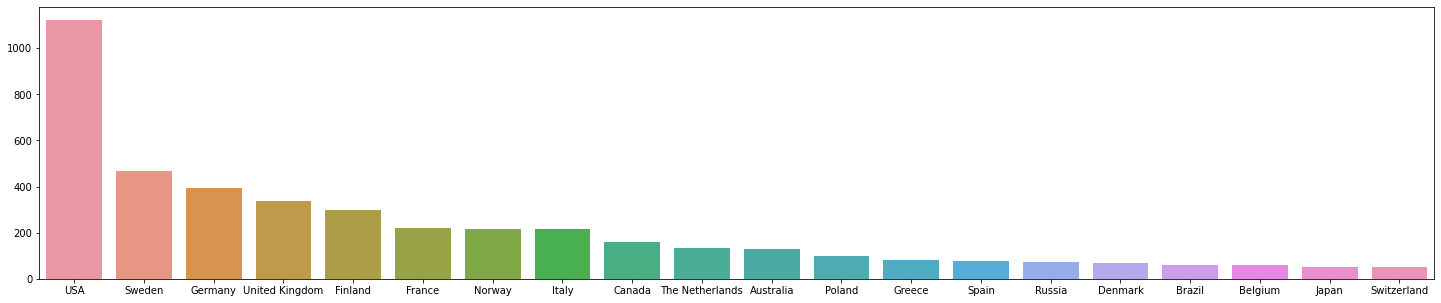

In [10]:
# Analisando Variaveis descritivas qualitativas - Gráfico de barras

plt.subplots(figsize=(25,5))
origin_total = clean_data["origin"].value_counts()
sns.barplot(x=origin_total[:20].keys(), y=origin_total[:20].values)
plt.show()

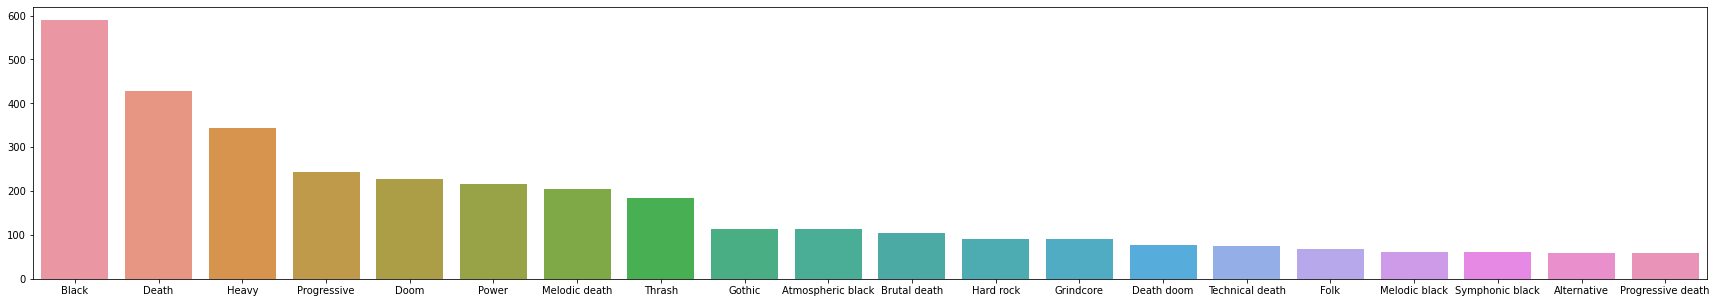

In [11]:
# Bandas de Metal por estilo principal

style_count = clean_data["main_style"].value_counts()
plt.subplots(figsize=(30,5))
sns.barplot(x=style_count[:20].keys(), y=style_count[:20].values)
plt.show()

In [12]:
#
# Analise de variaveis quantitativas slip e formed
# 
split_count = clean_data["split"].value_counts(ascending=False)
formed_count = clean_data["formed"].value_counts(ascending=False)

# Gerando DataFrame para a analise dos dados 
#
data_ = {'split': split_count, 'formed': formed_count}
pd_split_formed = pd.DataFrame(data=data_)
pd_split_formed.head()

,split,formed
-,2193.0,4
1964,NaN,1
1965,1.0,1
1967,2.0,3
1968,4.0,6


In [13]:
# Calculo das medias e medianas e desvio padrão

print('Descrição de variações numericas Split: \n', pd_split_formed['split'].agg(['min', 'max', 'mean', 'std', 'median']).round(decimals=2), sep='\n')
print('Descrição de variações numericas Formed: \n', pd_split_formed['formed'].agg(['min', 'max', 'mean', 'std', 'median']).round(decimals=2), sep='\n')


Descrição de variações numericas Split: 

min          1.00
max       2193.00
mean        99.00
std        305.82
median      44.50
Name: split, dtype: float64
Descrição de variações numericas Formed: 

min         1.00
max       270.00
mean       93.40
std        85.52
median     61.00
Name: formed, dtype: float64


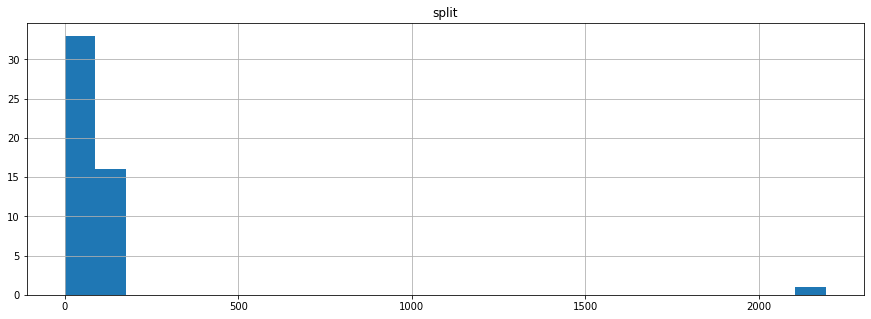

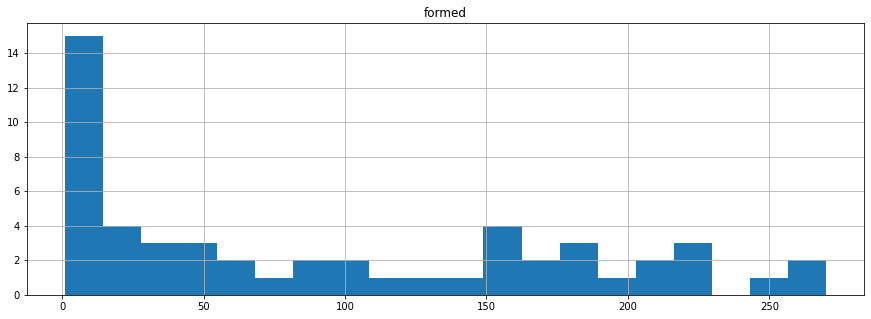

In [14]:
# Histograma das tabelas de split e formed

pd_split_formed.hist(figsize=(15,5), bins=25, column='split')
pd_split_formed.hist(figsize=(15,5), bins=20, column='formed')
plt.show()

#### Histograma das Bandas
Temos aqui tanto o histograma de bandas formadas, quanto o de bandas desfeitas, um formato de Assimétria igual, ambos são assimétricos a direita. Também devemos observar que as bandas formadas tem uma maior granularidade de dados dispostos no gráfico.

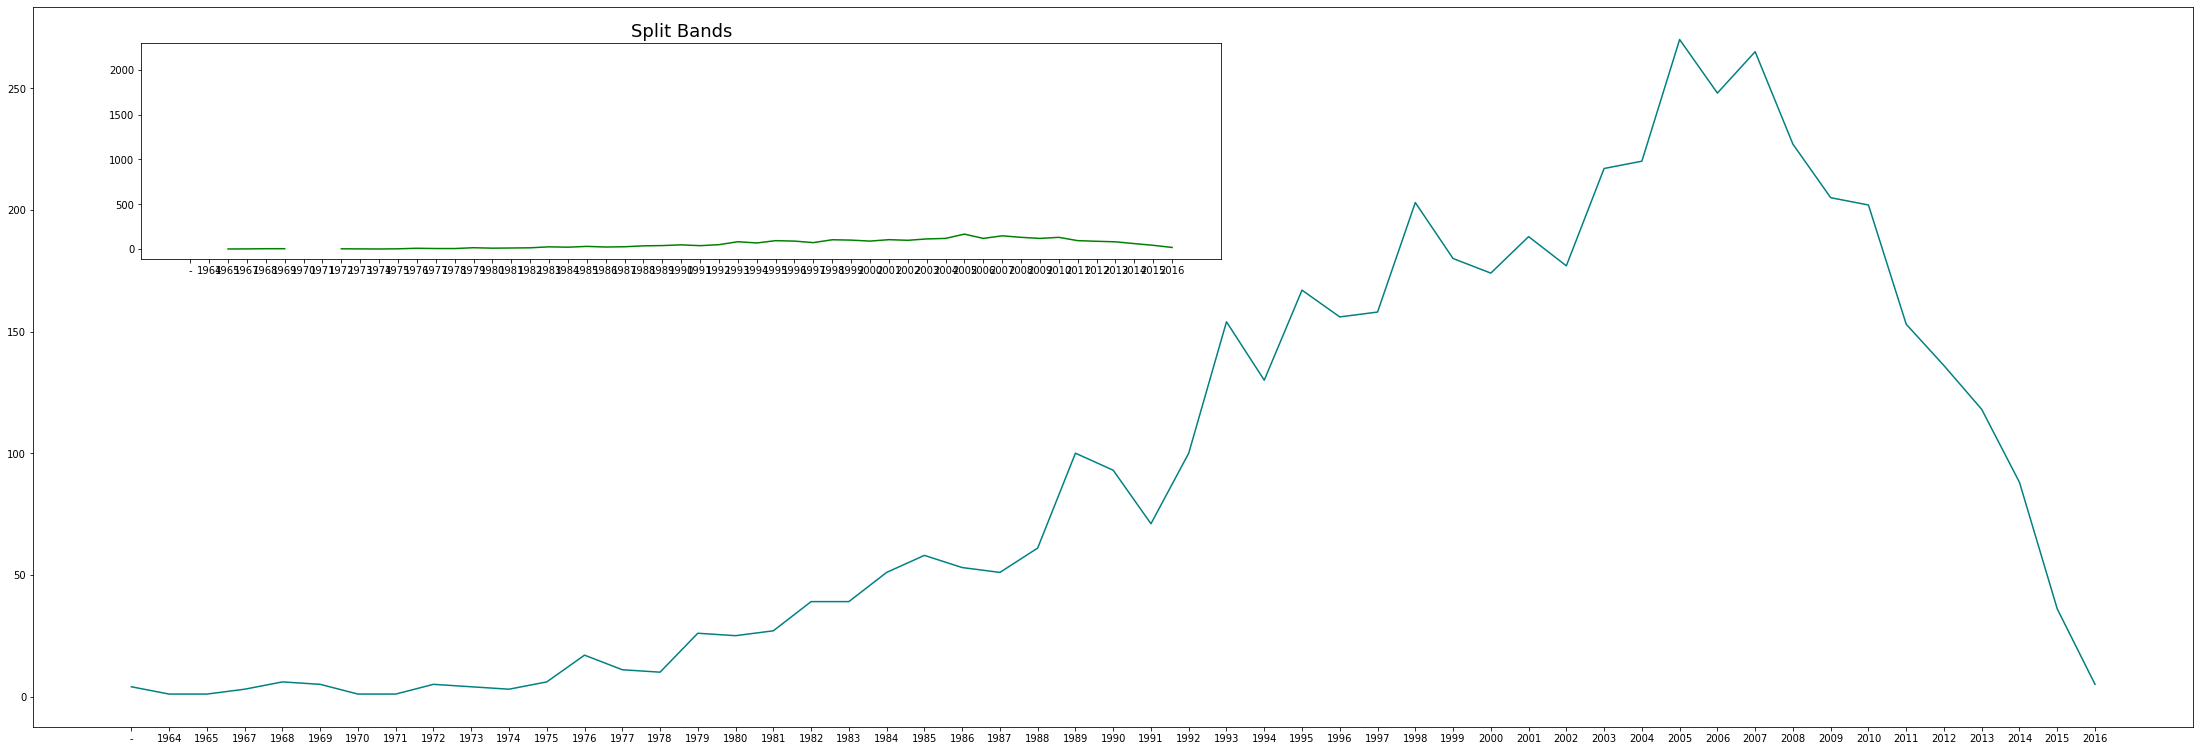

In [15]:
#
# Gráfico de comparação de bandas formadas x bandas desfeitas
#
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.05, 0.65, 0.5, 0.3])
ax1.plot(pd_split_formed["formed"], color='teal')
ax2.plot(pd_split_formed["split"], color='green')
ax2.set_title("Split Bands", fontsize=18)
plt.show()

Como podemos observar no gráfico acima, a curva de bandas criadas, a partir de 2007, começa a cair, o que nos leva a concluir que as formações de bandas de Metal estão em decadência.  

In [18]:
#
# Dicionario de possibilidades: 
# Qual a probabilidade de todos os estilo principal serem formados após os anos 2000 ?
# 

col_main_style_list = clean_data['main_style'].tolist()

likelihood_bands = {}
for ms in col_main_style_list: 

    # seleção de eventos para calcular probabilidade
    selecao_heavy = (clean_data.formed >= '2000') & (clean_data.main_style == ms)

    # Mapeando as probabilidades 
    likelihood_bands['Probabilidade do estilo {}'.format(ms)] = round(len(clean_data["formed"][selecao_heavy])/len(clean_data["formed"]), 3)

sort_likelihood = sorted(likelihood_bands.items(), key=lambda x: x[1], reverse=True)

print("Probabilidades: ", '\n'.join(str(v) for v in sort_likelihood), sep='\n')



Probabilidades: 
('Probabilidade do estilo Black', 0.076)
('Probabilidade do estilo Death', 0.045)
('Probabilidade do estilo Heavy', 0.034)
('Probabilidade do estilo Progressive', 0.034)
('Probabilidade do estilo Doom', 0.031)
('Probabilidade do estilo Melodic death', 0.028)
('Probabilidade do estilo Power', 0.02)
('Probabilidade do estilo Atmospheric black', 0.019)
('Probabilidade do estilo Thrash', 0.017)
('Probabilidade do estilo Brutal death', 0.012)
('Probabilidade do estilo Grindcore', 0.012)
('Probabilidade do estilo Gothic', 0.011)
('Probabilidade do estilo Symphonic', 0.01)
('Probabilidade do estilo Death doom', 0.01)
('Probabilidade do estilo Folk', 0.01)
('Probabilidade do estilo Technical death', 0.009)
('Probabilidade do estilo Sludge', 0.009)
('Probabilidade do estilo Funeral doom', 0.009)
('Probabilidade do estilo Progressive death', 0.008)
('Probabilidade do estilo Symphonic power', 0.008)
('Probabilidade do estilo Depressive black', 0.008)
('Probabilidade do estilo Met

### Conclusões

Após aplicarmos todas as probabilidades das bandas criadas após o ano de 2000, temos uma taxa muito baixa de criação onde:
'Probabilidade do estilo Black', 7%   |
'Probabilidade do estilo Death', 4,5% |
'Probabilidade do estilo Heavy', 3,4% |

Sendo estes os estilos de metal com maior chance de formação de 2000 - 2017.
